# KNN Clasificatoin

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error,mean_squared_error,PredictionErrorDisplay
from sklearn.model_selection import StratifiedKFold , cross_val_score
from sklearn.neighbors import KNeighborsClassifier ,KNeighborsRegressor
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [3]:
df = pd.read_csv('Crop_recommendation.csv')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [74]:
df_filter = df
df_filter = df_filter.drop(columns=['temperature','humidity','ph','rainfall'])
df_filter.head()

,N,P,K,label
0,90,42,43,rice
1,85,58,41,rice
2,60,55,44,rice
3,74,35,40,rice
4,78,42,42,rice


In [75]:
X = df_filter.drop(columns=['label'])
y = df_filter['label']

In [70]:
n_features = X.shape[1]
feature_names = X.columns

# Número de classes
classes = y.unique()

# Diferentes marcadores para cada classe
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'H', 'X', 'd', '|', '_', '+', 'x', '1', '2', '3', '4', '.', ',', 'P']

# Criar diretório para salvar as imagens (se necessário)
import os
output_dir = 'scatter_plots_bw'
os.makedirs(output_dir, exist_ok=True)

for i in range(n_features):
    for j in range(n_features):
        if i != j:
            plt.figure(figsize=(8, 6))
            for cls, marker in zip(classes, markers):
                plt.scatter(X[y == cls].iloc[:, i], X[y == cls].iloc[:, j], marker=marker, label=f'{cls}', color='black')
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{feature_names[i]} vs {feature_names[j]}')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            plt.grid(True)
            plt.savefig(os.path.join(output_dir, f'{feature_names[i]}_vs_{feature_names[j]}.png'), format='png', dpi=300, bbox_inches='tight')
            plt.close()

In [66]:
clf = KNeighborsClassifier(n_neighbors=15)
kf = StratifiedKFold(n_splits=10, shuffle=True)

In [61]:
accuracies = []

for fold, (train_index, test_index) in enumerate(kf.split(X, y)): 
    clf.fit(X.iloc[train_index], y.iloc[train_index])
    pred = clf.predict(X.iloc[test_index])
    accuracy = accuracy_score(y.iloc[test_index], pred)
    accuracies.append(accuracy)
    print(f'Acurácia no fold {fold + 1}: {accuracy:.4f}')

# Calcular a média das acurácias
mean_accuracy = np.mean(accuracies)
print(f'Média da acurácia nos folds: {mean_accuracy:.4f}')

Acurácia no fold 1: 0.9917
Acurácia no fold 2: 0.9500
Acurácia no fold 3: 0.9833
Acurácia no fold 4: 0.9583
Acurácia no fold 5: 0.9917
Acurácia no fold 6: 0.9500
Acurácia no fold 7: 0.9750
Acurácia no fold 8: 0.9583
Acurácia no fold 9: 0.9833
Acurácia no fold 10: 0.9500
Média da acurácia nos folds: 0.9692


Acurácia no fold 1: 0.9833
Acurácia no fold 2: 0.9583
Acurácia no fold 3: 0.9833
Acurácia no fold 4: 0.9500
Acurácia no fold 5: 0.9833
Acurácia no fold 6: 0.9667
Acurácia no fold 7: 0.9500
Acurácia no fold 8: 0.9750
Acurácia no fold 9: 0.9833
Acurácia no fold 10: 1.0000
Média da acurácia nos folds: 0.9733


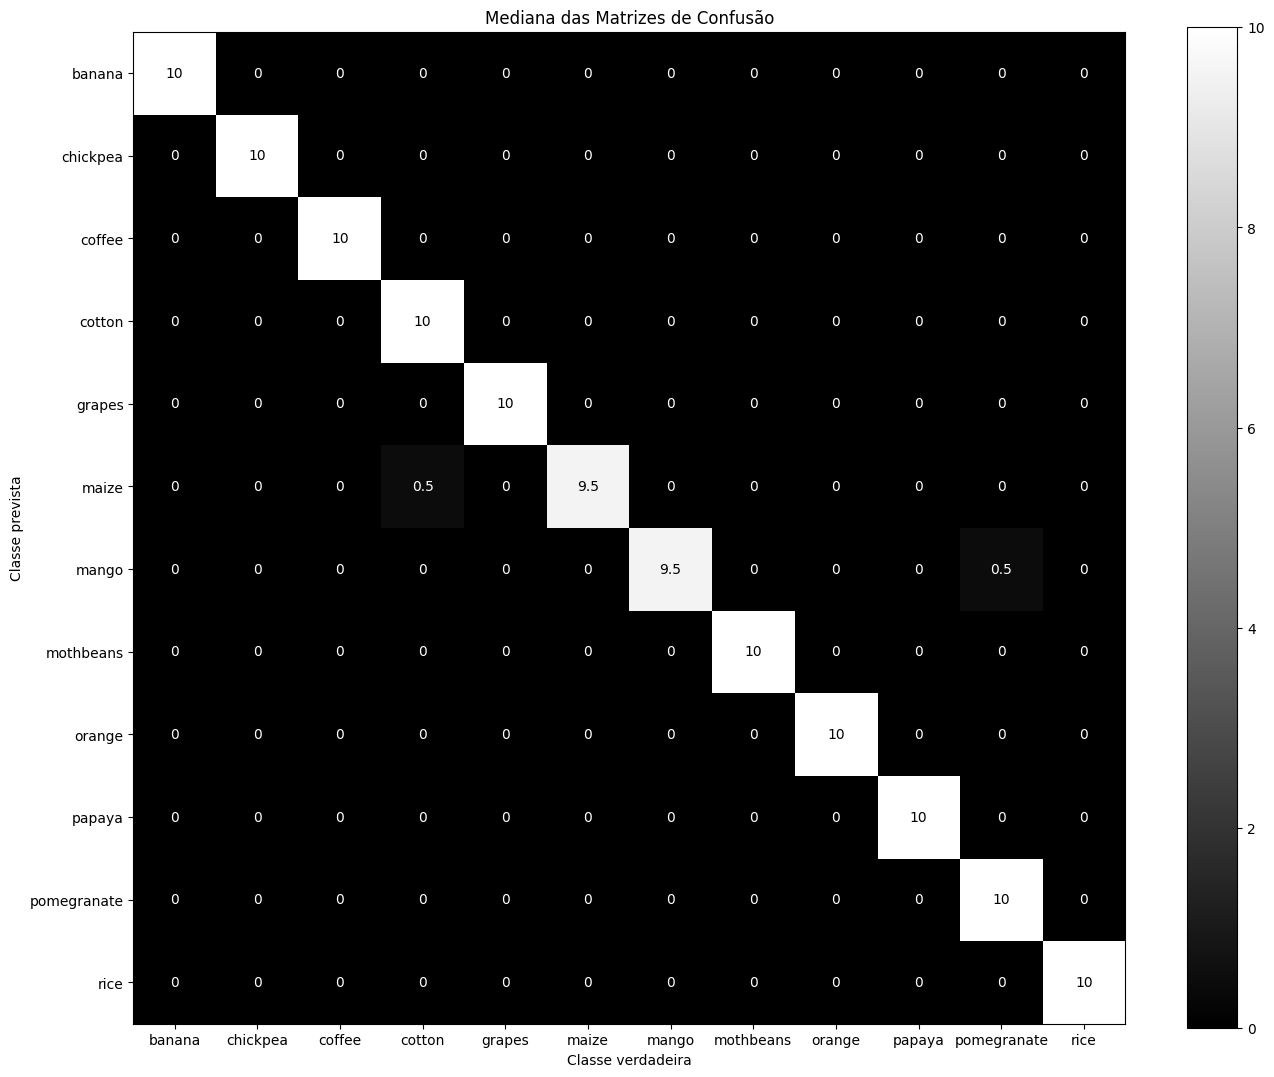

In [62]:
accuracies = []
confusion_matrices = []  # Definindo a lista para armazenar as matrizes de confusão

for fold, (train_index, test_index) in enumerate(kf.split(X, y)): 
    clf.fit(X.iloc[train_index], y.iloc[train_index])
    pred = clf.predict(X.iloc[test_index])
    accuracy = accuracy_score(y.iloc[test_index], pred)
    accuracies.append(accuracy)
    print(f'Acurácia no fold {fold + 1}: {accuracy:.4f}')

    cm = confusion_matrix(y.iloc[test_index], pred)
    confusion_matrices.append(cm)


# Calcular a média das acurácias
mean_accuracy = np.mean(accuracies)
print(f'Média da acurácia nos folds: {mean_accuracy:.4f}')

# Calcular a mediana da matriz de confusão
confusion_matrices = np.array(confusion_matrices)
median_confusion_matrix = np.median(confusion_matrices, axis=0)

# Exibir a mediana da matriz de confusão
fig, ax = plt.subplots(figsize=(16, 13))
cmd = ConfusionMatrixDisplay(median_confusion_matrix, display_labels=clf.classes_)
cmd.plot(ax=ax, cmap='gray')
plt.title('Mediana das Matrizes de Confusão')
plt.xlabel('Classe verdadeira')
plt.ylabel('Classe prevista')
plt.show()

# KNN regression


In [44]:
obj_columns = df.select_dtypes(['object']).columns
df_filter[obj_columns] = df_filter[obj_columns].apply(lambda x: pd.factorize(x)[0])
df_filter.describe()


X = df_filter.to_numpy()
y = df_filter.drop(columns = ['label']).to_numpy()
df_filter.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0


In [52]:
clf = KNeighborsRegressor(n_neighbors=10)
kf = StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:

for fold, (train, test) in enumerate(kf.split(X, y.argmax(1))): 
    clf.fit(X[train], y[train])    
    y_pred = clf.predict(X[test])


In [ ]:
clf.predict([[90,42,43,0]])